# Aryana Jaysingh Jadhav

# Data Science & Business Analytics Intern @ The Sparks Foundation(TSF)

# Topic: Prediction using Decision Tree Algorithm

## Dataset: Iris Dataset https://bit.ly/3kXTdox

In [1]:
# IMporting all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Reading data from remote link

data = pd.read_excel("C:\\Users\\aryana\\Downloads\\Iris.xlsx")
print("Successfully loaded")

Successfully loaded


In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica
149,150.0,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.shape

(150, 6)

In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    float64
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.value_counts()

Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1.0    5.1            3.5           1.4            0.2           Iris-setosa        1
95.0   5.6            2.7           4.2            1.3           Iris-versicolor    1
97.0   5.7            2.9           4.2            1.3           Iris-versicolor    1
98.0   6.2            2.9           4.3            1.3           Iris-versicolor    1
99.0   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                   ..
51.0   7.0            3.2           4.7            1.4           Iris-versicolor    1
52.0   6.4            3.2           4.5            1.5           Iris-versicolor    1
53.0   6.9            3.1           4.9            1.5           Iris-versicolor    1
54.0   5.5            2.3           4.0            1.3           Iris-versicolor    1
150.0  5.9            3.0           5.1            1.8     

In [15]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object
     SepalLengthCm  SepalWidthCm  PetalWidthCm  PetalLengthCm
0              5.1           3.5           0.2            1.4
1              4.9           3.0           0.2            1.4
2              4.7           3.2           0.2            1.3
3              4.6           3.1           0.2            1.5
4              5.0           3.6           0.2            1.4
..             ...           ...           ...            ...
145            6.7           3.0           2.3            5.2
146            6.3           2.5           1.9            5.0
147            6.5           3.0           2.0            5.2
148            6.2           3.4           2.3            5.4
149            5.9           3.0  

[Text(418.5, 747.4499999999999, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = blue'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = blue'),
 Text(482.8846153846154, 611.55, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = green'),
 Text(257.53846153846155, 475.65, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = green'),
 Text(128.76923076923077, 339.74999999999994, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = green'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = green'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = maroon'),
 Text(386.3076923076923, 339.74999999999994, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = maroon'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.

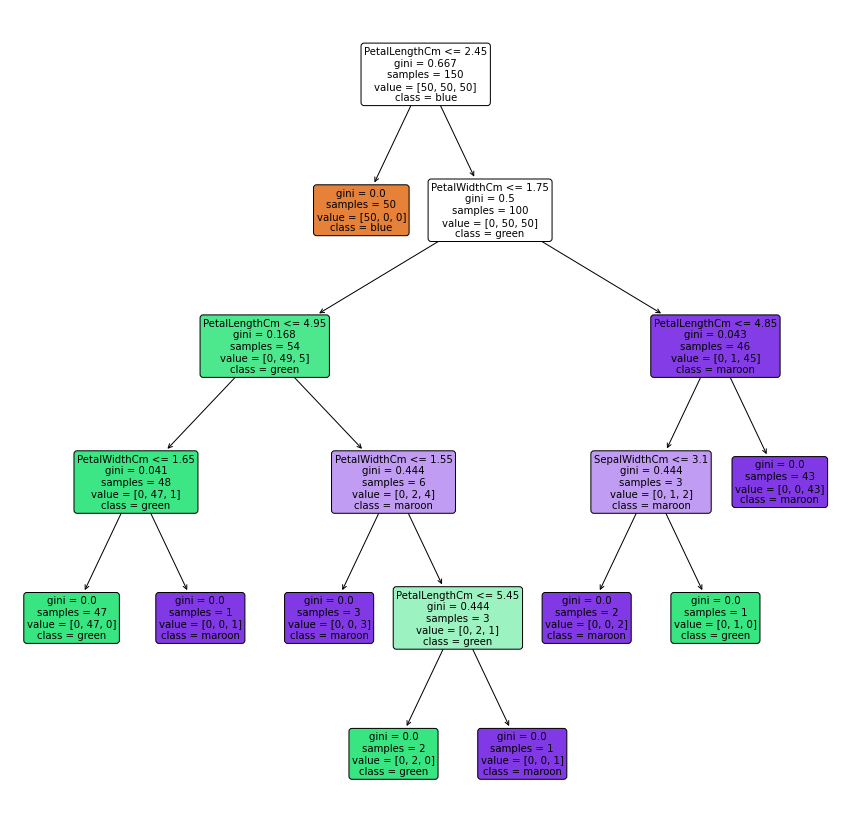

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


features=['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']
x= data[features]
y= data['Species']
print(y)
print(x)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)

plt.figure(figsize=(15,15))
tree.plot_tree(dtree, feature_names=features, class_names=["blue", "green", "maroon"], filled=True, rounded=True)